## Contents

#### 01. Importing libraries and data

#### 02. The Elbow Technique

#### 03. K-Means Clustering

## 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = 'C:/Users/David/Desktop/Career Foundry/King County house sales'

In [4]:
# Import KC house sales data using path 
df = pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'kc_houses_updated2.csv'))

In [5]:
df.shape

(21613, 23)

In [6]:
df.head()

,Unnamed: 0,house_id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,7129300520,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Low-level
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,6414100192,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Mid-Level 1
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,5631500400,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Low-level
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,2487200875,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Mid-Level 2
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1954400510,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Mid-Level 1


In [7]:
df.dtypes

Unnamed: 0          int64
house_id            int64
date_sold          object
price               int64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
year_built          int64
year_renovated      int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
price_category     object
dtype: object

In [8]:
#Remove 'Unnamed' column
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# Drop 'date_sold'
df = df.drop(['date_sold'], axis=1)

In [10]:
# Drop 'price_category'
df = df.drop(['price_category'], axis=1)

## 02. The Elbow Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-3.576625878715235e+23,
 -7.218752478173941e+22,
 -3.5486119586934167e+22,
 -1.9781399051463974e+22,
 -1.3046293276933659e+22,
 -7.839616280384151e+21,
 -5.954365553019592e+21,
 -4.47859570040349e+21,
 -3.5447272614353966e+21]

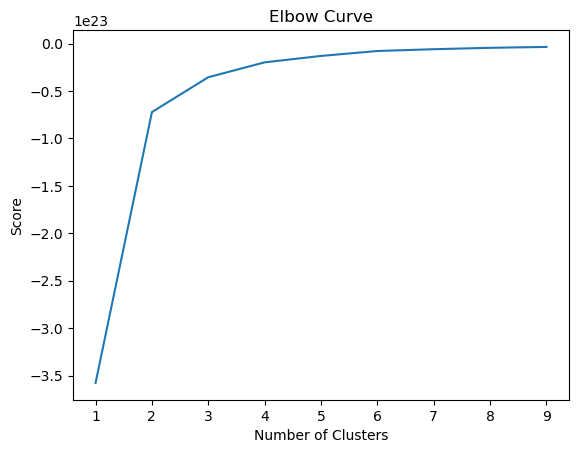

In [13]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to three on the x-axis. This means that the optimal count for my clusters is three.

## 03. K-Means Clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df.head()

,house_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,7129300520,221900,3,1.00,1180,5650,1.0,7129300520,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,538000,3,2.25,2570,7242,2.0,6414100192,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,180000,2,1.00,770,10000,1.0,5631500400,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000,4,3.00,1960,5000,1.0,2487200875,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,510000,3,2.00,1680,8080,1.0,1954400510,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [18]:
df['clusters'].value_counts()

clusters
1    7777
2    7011
0    6825
Name: count, dtype: int64

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


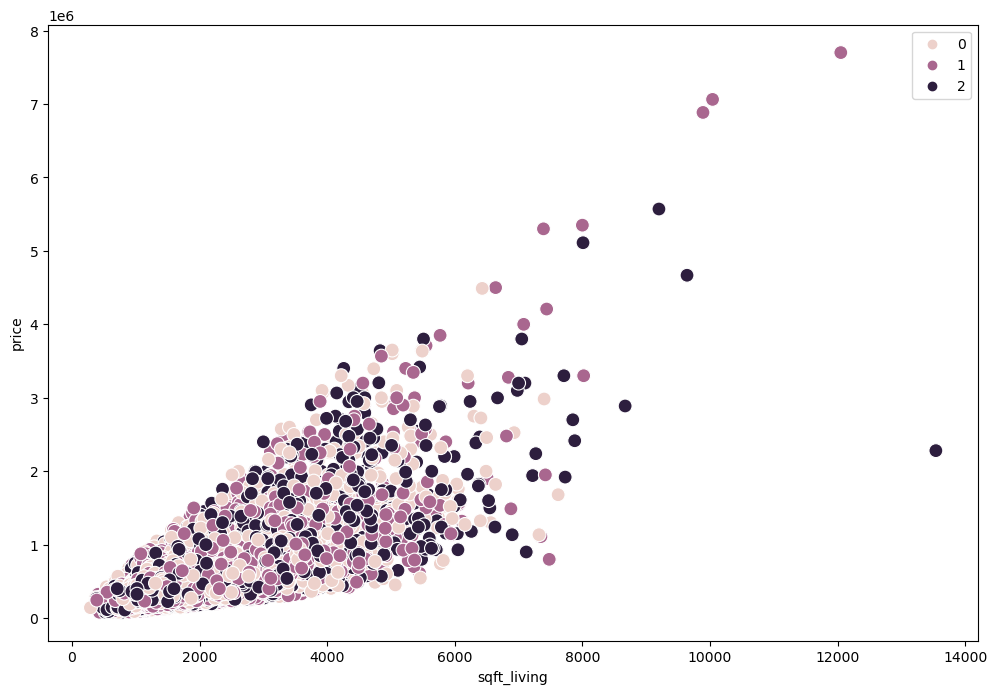

In [19]:
# Plot the clusters for the "Price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

There are visible clusters, however they are scattered and not in a distinct pattern. 

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


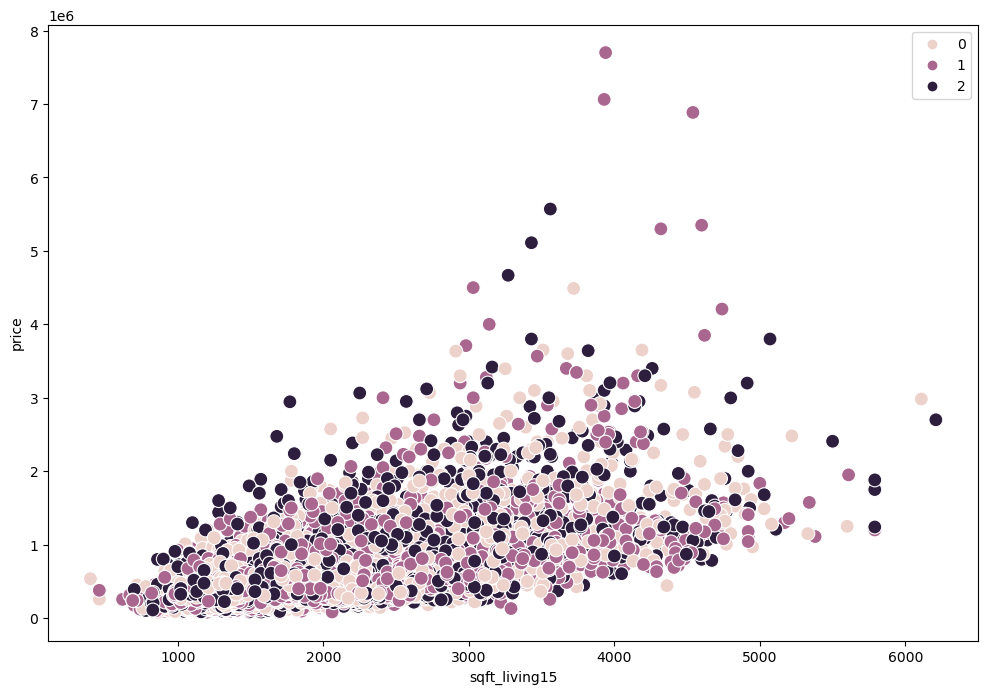

In [20]:
# Plot the clusters for the "Price" and "sqft_living15" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living15'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living15') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Again, there are visible clusters, but not grouped in  a distinct pattern. 

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


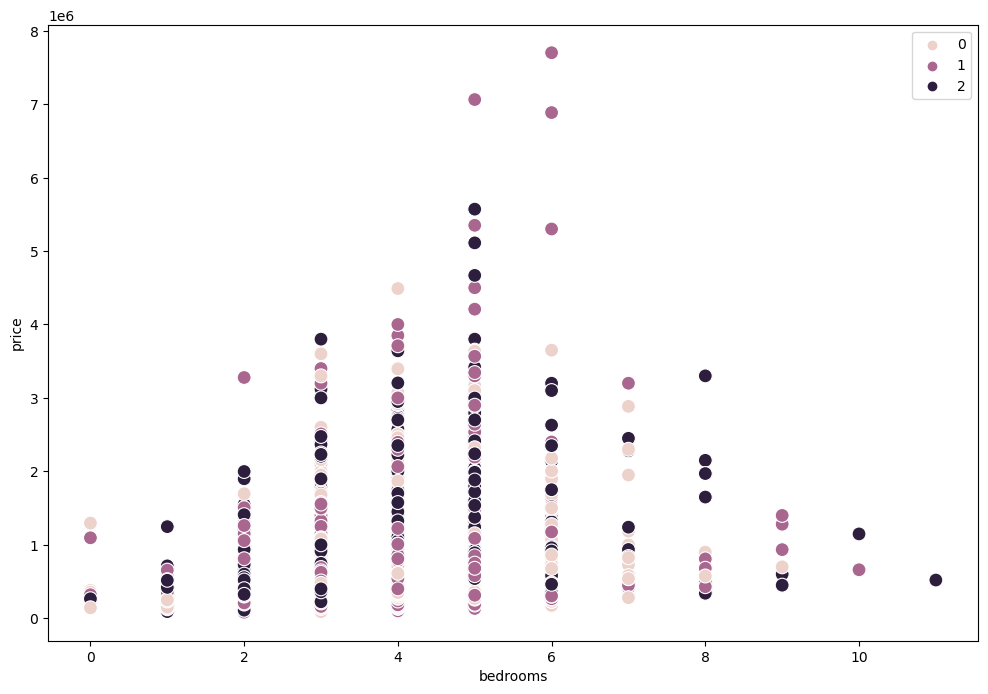

In [21]:
# Plot the clusters for the "Price" and "bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bedrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


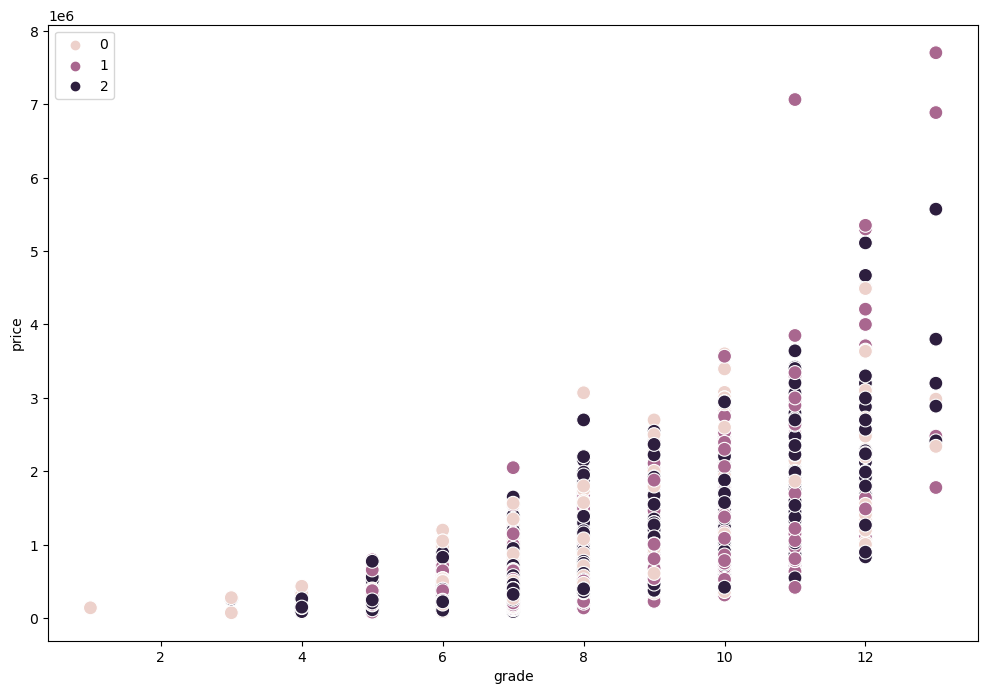

In [22]:
# Plot the clusters for the "price" and "grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['grade'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('grade') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


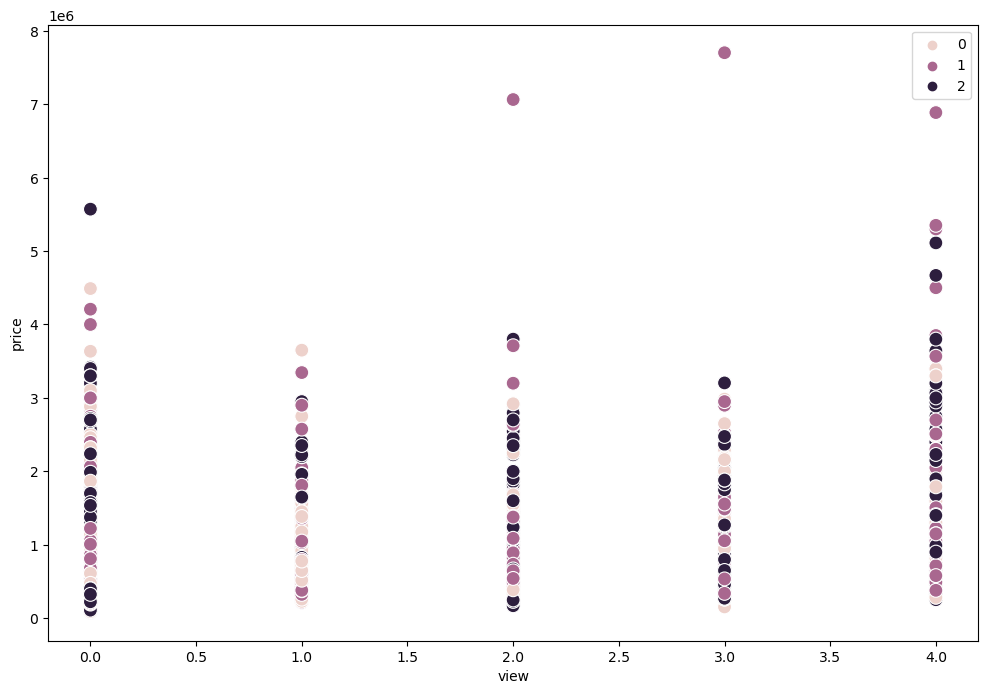

In [23]:
# Plot the clusters for the "Price" and "view" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['view'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('view') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

The clusters don't display a visible pattern. 

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\David\AppData\Local\Temp\ipykernel_5436\4155924145.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [25]:
df.groupby('cluster').agg({'price':['mean', 'median'],
                            'bedrooms':['mean', 'median'],
                          'bathrooms':['mean', 'median'],
                           'sqft_living':['mean', 'median'], 
                           'sqft_lot':['mean', 'median'],
                          'floors':['mean', 'median'],
                          'view':['mean', 'median'],
                          'year_built':['mean', 'median'],
                         'condition':['mean', 'median'], 
                           'grade':['mean', 'median'],
                            'lat':['mean', 'median'],
                          'long':['mean', 'median']})

price            bedrooms        bathrooms         \
                      mean    median      mean median      mean median   
cluster                                                                  
dark purple  552933.505491  449000.0  3.381971    3.0  2.126658   2.25   
pink         539545.755311  450000.0  3.366886    3.0  2.102344   2.25   
purple       528983.981098  455000.0  3.360422    3.0  2.117494   2.25   

             sqft_living              sqft_lot          ...   year_built  \
                    mean  median          mean  median  ...         mean   
cluster                                                 ...                
dark purple  2118.297105  1940.0  22731.367708  8138.0  ...  1970.592925   
pink         2064.362344  1900.0  13903.339341  7600.0  ...  1970.327179   
purple       2058.919763  1910.0   9289.826411  7204.0  ...  1971.971711   

                    condition            grade               lat           \
             median      mean median      mean median       mean   median   
cluster                                                                     
dark purple  1974.0  3.427899    3.0  7.670375    7.0  47.555391  47.5681   
pink         1972.0  3.420952    3.0  7.645128    7.0  47.561075  47.5707   
purple       1977.0  3.382667    3.0  7.655008    7.0  47.563358  47.5772   

                   long           
                   mean   median  
cluster                           
dark purple -122.206419 -122.211  
pink        -122.226568 -122.256  
purple      -122.209517 -122.235  

[3 rows x 24 columns]

#### Interpreting the data:


- Cluster label 2 (dark purple) has the highest average house price, $552933.57. Houses in this cluster consist of an average of 3.38 bedrooms with mean living area of 2118 Sqft, and an average grade of 7.67.


- Cluster label 0 (pink) has a mean house value of $539545.76. Houses in this cluster consists of an average of 3.37 bedrooms with mean living area of 2064 Sqft and an average grade of 7.64. 


- Cluster label 1 (purple) has a mean house value of $528983.98. Houses in this cluster consists of an average of 3.36 bedrooms with mean living area of 2025 Sqft and an average grade of 7.66. 

Dark purple has the best stats in almost all the categories.

There aren't very big difference between these categories, which might mean that that proximity could be a determinant of how much houses cost, for example, is it close to restaurants, schools, shops, and public parks, etc., so there are some limitations in this analysis.  It would be much more interesting if I had more columns related to the location to explore



#### How can these results be useful in future? 
 

I am interested to see if houses in the dark purple category make up the majority of houses in the area that I previously found to have the priciest houses in my Choropleth map. 

In [26]:
# Export clean data
df.to_csv(os.path.join(path, '02. Data','02. Prepared Data', 'kc_houses_updated3.csv'))